In [4]:
import gymnasium as gym
from gymnasium.wrappers import RecordEpisodeStatistics, RecordVideo
import numpy as np

# Configuration
num_eval_episodes = 4
env_name = "CartPole-v1"  # Replace with your environment

# Create environment with recording capabilities
env = gym.make(env_name, render_mode="rgb_array")  # rgb_array needed for video recording

# Add video recording for every episode
env = RecordVideo(
    env,
    video_folder="cartpole-agent",    # Folder to save videos
    name_prefix="eval",               # Prefix for video filenames
    episode_trigger=lambda x: True    # Record every episode
)

# Add episode statistics tracking
env = RecordEpisodeStatistics(env, buffer_length=num_eval_episodes)

print(f"Starting evaluation for {num_eval_episodes} episodes...")
print(f"Videos will be saved to: cartpole-agent/")

for episode_num in range(num_eval_episodes):
    obs, info = env.reset()
    episode_reward = 0
    step_count = 0

    episode_over = False
    while not episode_over:
        # Replace this with your trained agent's policy
        action = env.action_space.sample()  # Random policy for demonstration

        obs, reward, terminated, truncated, info = env.step(action)
        episode_reward += reward
        step_count += 1

        episode_over = terminated or truncated

    print(f"Episode {episode_num + 1}: {step_count} steps, reward = {episode_reward}")

env.close()

# Print summary statistics
print(f'\nEvaluation Summary:')
print(f'Episode durations: {list(env.time_queue)}')
print(f'Episode rewards: {list(env.return_queue)}')
print(f'Episode lengths: {list(env.length_queue)}')

# Calculate some useful metrics
avg_reward = np.sum(env.return_queue)
avg_length = np.sum(env.length_queue)
std_reward = np.std(env.return_queue)

print(f'\nAverage reward: {avg_reward:.2f} ± {std_reward:.2f}')
print(f'Average episode length: {avg_length:.1f} steps')
print(f'Success rate: {sum(1 for r in env.return_queue if r > 0) / len(env.return_queue):.1%}')

c:\Users\user\anaconda3\envs\ai_env\lib\site-packages\gymnasium\wrappers\rendering.py:296: UserWarning: WARN: Overwriting existing videos at c:\Users\user\Desktop\hasob_win\RL\MYRL\Test_gym\cartpole-agent folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Starting evaluation for 4 episodes...
Videos will be saved to: cartpole-agent/
Episode 1: 30 steps, reward = 30.0
Episode 2: 12 steps, reward = 12.0
Episode 3: 22 steps, reward = 22.0
Episode 4: 13 steps, reward = 13.0

Evaluation Summary:
Episode durations: [0.07986, 0.030405, 0.059826, 0.034707]
Episode rewards: [30.0, 12.0, 22.0, 13.0]
Episode lengths: [30, 12, 22, 13]

Average reward: 77.00 ± 7.33
Average episode length: 77.0 steps
Success rate: 100.0%


In [3]:
# !pip install "gymnasium[other]"

In [ ]:
import logging
import gymnasium as gym
from gymnasium.wrappers import RecordEpisodeStatistics, RecordVideo

# Training configuration
training_period = 250           # Record video every 250 episodes
num_training_episodes = 10_000  # Total training episodes
env_name = "CartPole-v1"

# Set up logging for episode statistics
logging.basicConfig(level=logging.INFO, format='%(message)s')

# Create environment with periodic video recording
env = gym.make(env_name, render_mode="rgb_array")

# Record videos periodically (every 250 episodes)
env = RecordVideo(
    env,
    video_folder="cartpole-training",
    name_prefix="training",
    episode_trigger=lambda x: x % training_period == 0  # Only record every 250th episode
)

# Track statistics for every episode (lightweight)
env = RecordEpisodeStatistics(env)

print(f"Starting training for {num_training_episodes} episodes")
print(f"Videos will be recorded every {training_period} episodes")
print(f"Videos saved to: cartpole-training/")

for episode_num in range(num_training_episodes):
    obs, info = env.reset()
    episode_over = False

    while not episode_over:
        # Replace with your actual training agent
        action = env.action_space.sample()  # Random policy for demonstration
        obs, reward, terminated, truncated, info = env.step(action)
        episode_over = terminated or truncated

    # Log episode statistics (available in info after episode ends)
    if "episode" in info:
        episode_data = info["episode"]
        logging.info(f"Episode {episode_num}: "
                    f"reward={episode_data['r']:.1f}, "
                    f"length={episode_data['l']}, "
                    f"time={episode_data['t']:.2f}s")

        # Additional analysis for milestone episodes
        if episode_num % 1000 == 0:
            # Look at recent performance (last 100 episodes)
            recent_rewards = list(env.return_queue)[-100:]
            if recent_rewards:
                avg_recent = sum(recent_rewards) / len(recent_rewards)
                print(f"  -> Average reward over last 100 episodes: {avg_recent:.1f}")

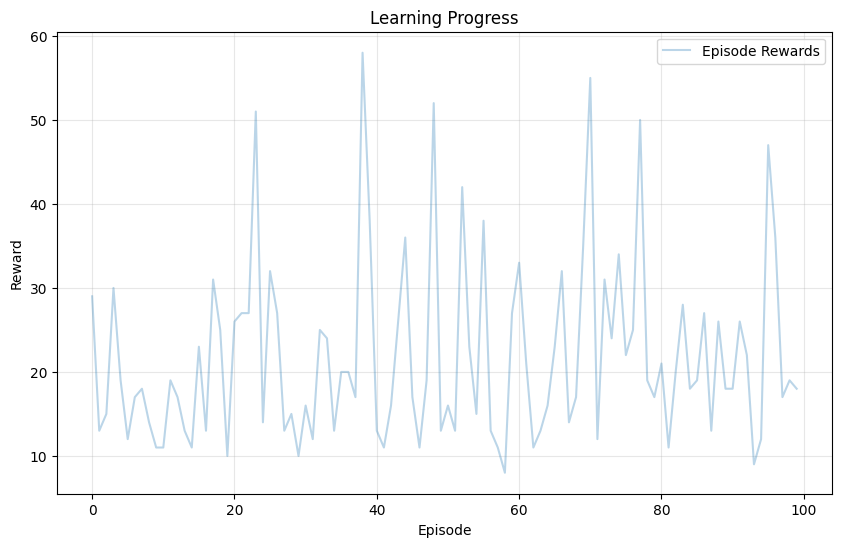

In [6]:
import matplotlib.pyplot as plt

# Plot learning progress
episodes = range(len(env.return_queue))
rewards = list(env.return_queue)

plt.figure(figsize=(10, 6))
plt.plot(episodes, rewards, alpha=0.3, label='Episode Rewards')

# Add moving average for clearer trend
window = 100
if len(rewards) > window:
    moving_avg = [sum(rewards[i:i+window])/window
                  for i in range(len(rewards)-window+1)]
    plt.plot(range(window-1, len(rewards)), moving_avg,
             label=f'{window}-Episode Moving Average', linewidth=2)

plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Learning Progress')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Example with Weights & Biases (wandb)
import wandb

# Initialize experiment tracking
wandb.init(project="cartpole-training", name="q-learning-run-1")

# Log episode statistics
for episode_num in range(num_training_episodes):
    # ... training code ...

    if "episode" in info:
        episode_data = info["episode"]
        wandb.log({
            "episode": episode_num,
            "reward": episode_data['r'],
            "length": episode_data['l'],
            "episode_time": episode_data['t']
        })

        # Upload videos periodically
        if episode_num % training_period == 0:
            video_path = f"cartpole-training/training-episode-{episode_num}.mp4"
            if os.path.exists(video_path):
                wandb.log({"training_video": wandb.Video(video_path)})

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

In [ ]:
# !pip install wandb

   ---------------------------------------- 0.0/21.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/21.5 MB ? eta -:--:--
   ---- ----------------------------------- 2.4/21.5 MB 8.4 MB/s eta 0:00:03
   -------------- ------------------------- 7.9/21.5 MB 16.8 MB/s eta 0:00:01
   -------------- ------------------------- 7.9/21.5 MB 16.8 MB/s eta 0:00:01
   --------------- ------------------------ 8.4/21.5 MB 9.1 MB/s eta 0:00:02
   -------------------- ------------------- 11.3/21.5 MB 10.2 MB/s eta 0:00:01
   ------------------------ --------------- 13.4/21.5 MB 9.9 MB/s eta 0:00:01
   ---------------------------------- ----- 18.4/21.5 MB 12.1 MB/s eta 0:00:01
   ---------------------------------------- 21.5/21.5 MB 12.3 MB/s eta 0:00:00

   -------- ------------------------------- 1/5 [sentry-sdk]
   -------- ------------------------------- 1/5 [sentry-sdk]
   -------- ------------------------------- 1/5 [sentry-sdk]
   -------- ------------------------------- 1/5 [se